In [1]:
import pandas as pd
df = pd.read_csv(r"L:\HP\Data Mining\TASA\Data\Data\Non-Political\scrapped.csv")
news = df["text"].dropna()

In [2]:
import re, math
from collections import defaultdict

def tokenize(_str):
    stopwords = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'is','if','while','this']
    tokens = defaultdict(lambda: 0,)
    for m in re.finditer(r"(\w+)", _str, re.UNICODE):
        m = m.group(1).lower()
        if len(m) < 2: continue
        if m in stopwords: continue
        tokens[m] += 1

    return tokens
#end of tokenize

def kldiv(_s, _t):
    if (len(_s) == 0):
        return 1e33

    if (len(_t) == 0):
        return 1e33

    ssum = 0. + sum(_s.values())
    slen = len(_s)

    tsum = 0. + sum(_t.values())
    tlen = len(_t)

    vocabdiff = set(_s.keys()).difference(set(_t.keys()))
    lenvocabdiff = len(vocabdiff)

    """ epsilon """
    epsilon = min(min(_s.values())/ssum, min(_t.values())/tsum) * 0.001

    """ gamma """
    gamma = 1 - lenvocabdiff * epsilon

    # print "_s: %s" % _s
    # print "_t: %s" % _t

    """ Check if distribution probabilities sum to 1"""
    sc = sum([v/ssum for v in _s.values()])
    st = sum([v/tsum for v in _t.values()])

    if sc < 9e-6:
        print ("Sum P: %e, Sum Q: %e" % (sc, st))
        print ("*** ERROR: sc does not sum up to 1. Bailing out ..")
        sys.exit(2)
    if st < 9e-6:
        print ("Sum P: %e, Sum Q: %e" % (sc, st))
        print ("*** ERROR: st does not sum up to 1. Bailing out ..")
        sys.exit(2)

    div = 0.
    for t, v in _s.items():
        pts = v / ssum

        ptt = epsilon
        if t in _t:
            ptt = gamma * (_t[t] / tsum)

        ckl = (pts - ptt) * math.log(pts / ptt)

        div +=  ckl

    return div
#end of kldiv

In [3]:
def dictforallnews():
    kldict = dict();relkldict = dict()
    counti=counto=1
    for n1 in news:
        for n2 in news:
            if n1 == n2:
                continue
            else:
                #print("Document Number "+str(counto)+" To "+str(counti))
                kl1=kldiv(tokenize(n1), tokenize(n2))
                kl2=kldiv(tokenize(n2), tokenize(n1))
                #print ("KL-divergence between d1 and d2:",kl1 )
                #print ("KL-divergence between d2 and d1:",kl2 )
                klavg = (kl1+kl2)/2
                #print ("KL-divergence Average",klavg )
                klnorm = math.atan(klavg) / 3.1416 + 1 / 2
                #print(counto," ",counti)
                kldict[str(counto) + str(counti)] = klnorm;
                pn1,pn2 = computepolarity(n1,n2)
                rp1,rp2 = relativepolarity(pn1,pn2,klnorm)
                relkldict[str(counto) + str(counti)] = avg(rp1,rp2)
                #print(rp1,rp2)
                
                
            counti += 1
        
        counti = 1
        counto += 1
    return kldict,relkldict

In [5]:
news = list(news)

In [6]:
from textblob import TextBlob

In [7]:
def computepolarity(n1,n2):
    tn1 = TextBlob(n1);tn2 = TextBlob(n2)
    parapoln1 = tn1.sentiment.polarity;parapoln2 = tn2.sentiment.polarity
    return parapoln1,parapoln2
    

In [8]:
def relativepolarity(pn1,pn2,KL):
    rp1 = pn1 * KL
    rp2 = pn2 * KL
    return rp1,rp2
    

In [9]:
def avg(a,b):
    c = (a + b)/2
    return c

## Ratio Old

In [10]:
import pandas as pd
from textblob import TextBlob
df = pd.read_csv(r"L:\HP\Data Mining\TASA\Data\Data\Non-Political\scrapped.csv")
news = df["text"].dropna()
ps = 0;tnew = 0.0;ratios = []
ratio = 0.0;
paragraph = []
for new in news:
    senval = []
    senew = TextBlob(new).sentences
    parapol = TextBlob(new).sentiment.polarity
    #print("Paragraph pol",parapol)
    count = 0
    for sen in senew:
        count = count + 1
        senpol = sen.sentiment.polarity
        try:
            ratio = senpol/parapol
            ratios.append(ratio)
        except ZeroDivisionError:
            ratios.append(0)


In [11]:
nratio = list()
for e in ratios:
    nratio.append(math.atan(e) / 3.1416 + 1 / 2) 

In [12]:
k,rk = dictforallnews()

In [13]:
len(nratio)

548

In [14]:
nrk = list(rk.values())
len(nrk)

832

In [29]:
nrk = nrk[:548]
nrk

[0.05349040276885862,
 0.08369549736291662,
 0.06812950687395072,
 0.09019169507018338,
 0.10588201076377265,
 0.15584845706631423,
 0.04980620329689338,
 0.039590512472777416,
 0.045838853257709034,
 0.07610298491524457,
 0.07610298491524457,
 0.05240053271592997,
 0.08211177057876025,
 0.06749778658840921,
 0.08832215485838457,
 0.10512848075818997,
 0.15340478168559785,
 0.04842227600869597,
 0.038042020449387925,
 0.09178714474380656,
 0.1329716931080823,
 0.10929499187842388,
 0.1390326551348128,
 0.12458564842532019,
 0.14594124478427717,
 0.16234698372965436,
 0.21161549526392542,
 0.10563109184642396,
 0.09600131836982427,
 0.05349040276885862,
 0.060161191258643824,
 0.04516733666095703,
 0.0665582258116669,
 0.08100425428243187,
 0.13180775192732821,
 0.02647766769985536,
 0.015608756983873838,
 0.02240829492493328,
 0.05240053271592997,
 0.09178714474380656,
 0.06837500003515401,
 0.09854897275275831,
 0.08304933676785617,
 0.10513213156879653,
 0.12053332077810736,
 0.17084

In [16]:
x = nratio
y = nrk

In [17]:
import matplotlib.pyplot as plt

In [18]:
colors = ['green','cyan']

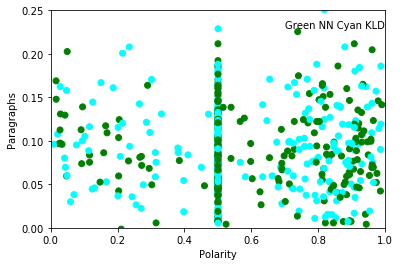

In [19]:
plt.xlabel("Polarity")
plt.ylabel("Paragraphs")
plt.axis([0,1,0,0.25])
plt.scatter(x,y,c=colors,label = colors)
plt.text(0.7,0.23,r'Green NN Cyan KLD')
plt.show()

In [30]:
import pickle
fp = open('NonPolitocol1.pkl','wb')
pickle.dump(nrk,fp)
fp.close()

In [31]:
fp1 = open('NonPolitocol2.pkl','wb')
pickle.dump(nratio,fp1)
fp.close()

In [34]:
import re, math
from collections import defaultdict

def tokenize(_str):
    stopwords = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'is','if','while','this']
    tokens = defaultdict(lambda: 0,)
    for m in re.finditer(r"(\w+)", _str, re.UNICODE):
        m = m.group(1).lower()
        if len(m) < 2: continue
        if m in stopwords: continue
        tokens[m] += 1

    return tokens
#end of tokenize

def kldiv(_s, _t):
    if (len(_s) == 0):
        return 1e33

    if (len(_t) == 0):
        return 1e33

    ssum = 0. + sum(_s.values())
    slen = len(_s)

    tsum = 0. + sum(_t.values())
    tlen = len(_t)

    vocabdiff = set(_s.keys()).difference(set(_t.keys()))
    lenvocabdiff = len(vocabdiff)

    """ epsilon """
    epsilon = min(min(_s.values())/ssum, min(_t.values())/tsum) * 0.001

    """ gamma """
    gamma = 1 - lenvocabdiff * epsilon

    # print "_s: %s" % _s
    # print "_t: %s" % _t

    """ Check if distribution probabilities sum to 1"""
    sc = sum([v/ssum for v in _s.values()])
    st = sum([v/tsum for v in _t.values()])

    if sc < 9e-6:
        print ("Sum P: %e, Sum Q: %e" % (sc, st))
        print ("*** ERROR: sc does not sum up to 1. Bailing out ..")
        sys.exit(2)
    if st < 9e-6:
        print ("Sum P: %e, Sum Q: %e" % (sc, st))
        print ("*** ERROR: st does not sum up to 1. Bailing out ..")
        sys.exit(2)

    div = 0.
    for t, v in _s.items():
        pts = v / ssum

        ptt = epsilon
        if t in _t:
            ptt = gamma * (_t[t] / tsum)

        ckl = (pts - ptt) * math.log(pts / ptt)

        div +=  ckl

    return div
#end of kldiv

In [50]:
import pandas as pd
df = pd.read_csv(r"L:\HP\Data Mining\TASA\Associated Modules\Set-3\tutorial\scrapped.csv")
news = df["text"].dropna()
dff = pd.read_csv(r"L:\HP\Data Mining\TASA\Data\Data\Non-Political\scrapped.csv")
nonpol = dff["text"].dropna()
kld = list()
#for n1 in news:
    #for n2 in nonpol:
n1 = """ Sections | | 4 Police in California arrested a 14-year-old boy in connection with a shooting at a high school near Los Angeles on Friday that left one hurt, the local sheriff's department and education officials said. The Los Angeles County Sheriff said the suspect had been detained near Highland High School in Palmdale, 40 miles (65 kilometers) north of downtown Los Angeles. Both were students at the school. "Deputies responded immediately to Palmdale shooting, arrest made, weapon found, active investigation underway. Reasonably sure threat is contained," department spokesman Jim McDonnell tweeted. The suspect was a "male Hispanic juvenile," the sheriff's office said, later clarifying that the weapon was a rifle that was "recovered off campus." The sheriff's office said a boy had been shot in the arm at the school and was in stable condition at a local hospital. Local media reported that the victim, also 14, was wounded as he was getting out of the car that brought him to the campus. Agents with the Department of Alcohol, Tobacco, Firearms and Explosives (ATF) were heading to the scene, the agency said. About a half hour later, calls were received about "shots fired" near Manzanita Elementary School, around eight miles to the west, the sheriff's department reported, adding that officers found no evidence of a crime there. Deputies said they had secured both locations, and were investigating. "We are all concerned about the safety of our children," Palmdale School District Superintendent Raul Maldonado said in an alert. "It has been confirmed that earlier this morning, there was an active shooter on the Highland High School campus. Â Apparently, the person was already apprehended. "I want to let you know that all of the Palmdale Elementary Schools were put on lockdown, and will stay on lockdown until the situation is confirmed as safe for our students, teachers, staff and parents." Highland confirmed in a tweet that it saw "no threat" to pupils and added that staff were working with law enforcement to determine release procedures for students. Â© Copyright NDTV Convergence Limited 2018. All rights reserved."""
n2 = """Saturday, Mar 03, 2018 | Last Update : 11:18 PM IST Prime Minister Narendra Modi on Saturday called the BJP's impressive performance in Tripura Assembly polls people's answer to "fear, lies and confusion" being spread against his government, and targeted the Congress, saying it was never so diminished as a party as it is now. Addressing party workers at the BJP's newly constructed headquarters following the announcement of results of polls in Tripura, Nagaland and Meghalaya, the Prime Minister also took an apparent dig at Congress president Rahul Gandhi, saying some people grow in designation but shrink in stature. In contrast, he said, BJP chief Amit Shah rose by leading the party to victories in many states.  In remarks laced with sarcasm, Narendra Modi said he had recently told Puducherry Chief Minister V Narayanasamy that the Congress leader was lucky as he will soon become a "specimen of a Congress chief minister" as his party will be in power only in his state by June after losing Karnataka, which goes to the polls in April-May. Referring to Punjab Chief Minister Amarinder Singh, who heads the Congress government in the state, he said neither he nor they (Congress) consider each other their own. "He is a 'swatantra fauji' (independent soldier)," Narendra Modi said of Amarinder Singh. The Prime Minister said people of northeast had a sense of alienation but his government worked overtime to remove it. Central ministers have spent more nights in one of these states to deal with their problems in the last four years than they did all the years earlier, he said. "Fear, lies and confusion were being spread," he said, an apparent reference to the opposition's criticism of his government over a host of issues, and now people have answered it through their votes. Prime Minister Narendra Modi took a brief pause when there was a call for prayers from a nearby mosque, and also paid respects along with the audience to deceased party workers, allegedly victims of political violence, by keeping silence for a while. He was felicitated by senior party functionaries, including members of the BJP parliamentary board, headed by Amit Shah."""
n3 = "I want an apple pineapple banana"
n4 = "Even I want apple and pomegranate"

kl = kldiv(tokenize(n4),tokenize(n3))
kll = kldiv(tokenize(n1),tokenize(n2))
klnorm = math.atan(kll) / 3.1416 + 1 / 2
kld.append(klnorm)


In [51]:
print(kll,kl,kld)

6.01403999536446 3.4504238868828376 [0.9475510079967346]
